In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import glob

## Data Collection

In [3]:
glob.glob(r'/content/drive/MyDrive/Datasets/Stocks_Data/*csv')

['/content/drive/MyDrive/Datasets/Stocks_Data/XYL_data.csv',
 '/content/drive/MyDrive/Datasets/Stocks_Data/WMT_data.csv',
 '/content/drive/MyDrive/Datasets/Stocks_Data/XRAY_data.csv',
 '/content/drive/MyDrive/Datasets/Stocks_Data/VFC_data.csv',
 '/content/drive/MyDrive/Datasets/Stocks_Data/VIAB_data.csv',
 '/content/drive/MyDrive/Datasets/Stocks_Data/WYNN_data.csv',
 '/content/drive/MyDrive/Datasets/Stocks_Data/WY_data.csv',
 '/content/drive/MyDrive/Datasets/Stocks_Data/WLTW_data.csv',
 '/content/drive/MyDrive/Datasets/Stocks_Data/XRX_data.csv',
 '/content/drive/MyDrive/Datasets/Stocks_Data/ZION_data.csv',
 '/content/drive/MyDrive/Datasets/Stocks_Data/WYN_data.csv',
 '/content/drive/MyDrive/Datasets/Stocks_Data/WBA_data.csv',
 '/content/drive/MyDrive/Datasets/Stocks_Data/ZBH_data.csv',
 '/content/drive/MyDrive/Datasets/Stocks_Data/XOM_data.csv',
 '/content/drive/MyDrive/Datasets/Stocks_Data/WEC_data.csv',
 '/content/drive/MyDrive/Datasets/Stocks_Data/WDC_data.csv',
 '/content/drive/MyD

In [4]:
len(glob.glob(r'/content/drive/MyDrive/Datasets/Stocks_Data/*csv'))

509

In [5]:
company_list = [
    r'/content/drive/MyDrive/Datasets/Stocks_Data/AAPL_data.csv',
    r'/content/drive/MyDrive/Datasets/Stocks_Data/AMZN_data.csv',
    r'/content/drive/MyDrive/Datasets/Stocks_Data/GOOG_data.csv',
    r'/content/drive/MyDrive/Datasets/Stocks_Data/MSFT_data.csv',
]

In [6]:
full_df = pd.DataFrame()

for file in company_list:
  current_df = pd.read_csv(file)
  # full_df = current_df.append(full_df, ignore_index=True)
  full_df = pd.concat([full_df, current_df], ignore_index=True)

In [7]:
full_df.shape

(4752, 7)

In [8]:
full_df.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL


In [9]:
full_df['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

## Data Cleaning

In [10]:
full_df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0


In [11]:
full_df.dtypes

,0
date,object
open,float64
high,float64
low,float64
close,float64
volume,int64
Name,object


In [12]:
full_df['date'] = pd.to_datetime(full_df['date'])
full_df['date']

,date
0,2013-02-08
1,2013-02-11
2,2013-02-12
3,2013-02-13
4,2013-02-14
...,...
4747,2018-02-01
4748,2018-02-02
4749,2018-02-05
4750,2018-02-06


## Analysing change in price of the stock over time

In [13]:
tech_list = full_df['Name'].unique()
tech_list

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

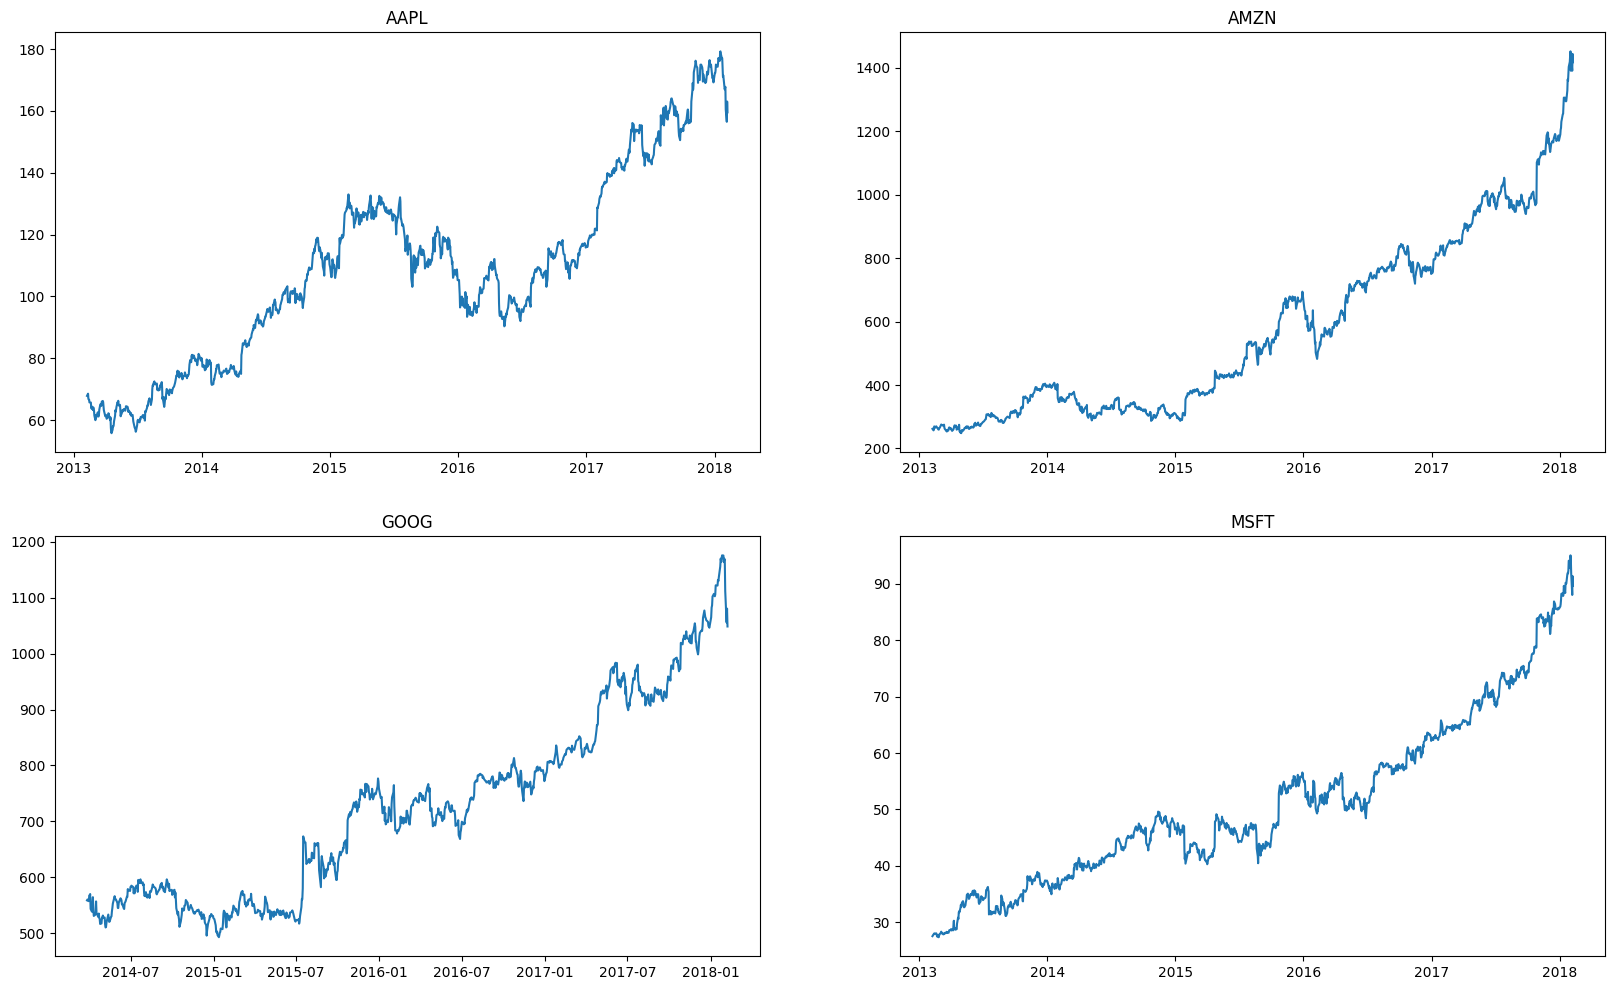

In [14]:
plt.figure(figsize=(20,12))

for index, company in enumerate(tech_list, 1):
  plt.subplot(2, 2, index)
  filter1 = full_df['Name']==company
  df = full_df[filter1]
  plt.plot(df['date'], df['close'])
  plt.title(company)

## Analysing the moving average of various stocks

In [15]:
full_df.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


In [16]:
full_df['close'].rolling(window=10).mean().head(15)

,close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,66.03251


In [17]:
new_data = full_df.copy()

In [18]:
ma_day = [10, 20, 50]

for ma in ma_day:
  new_data['close_'+str(ma)] = new_data['close'].rolling(window=ma).mean()

In [19]:
new_data.tail()

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


In [20]:
new_data.set_index('date', inplace=True)

In [21]:
new_data

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,92.765,90.6770,86.9978
2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,92.943,90.9105,87.1828
2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,92.582,90.9010,87.2684


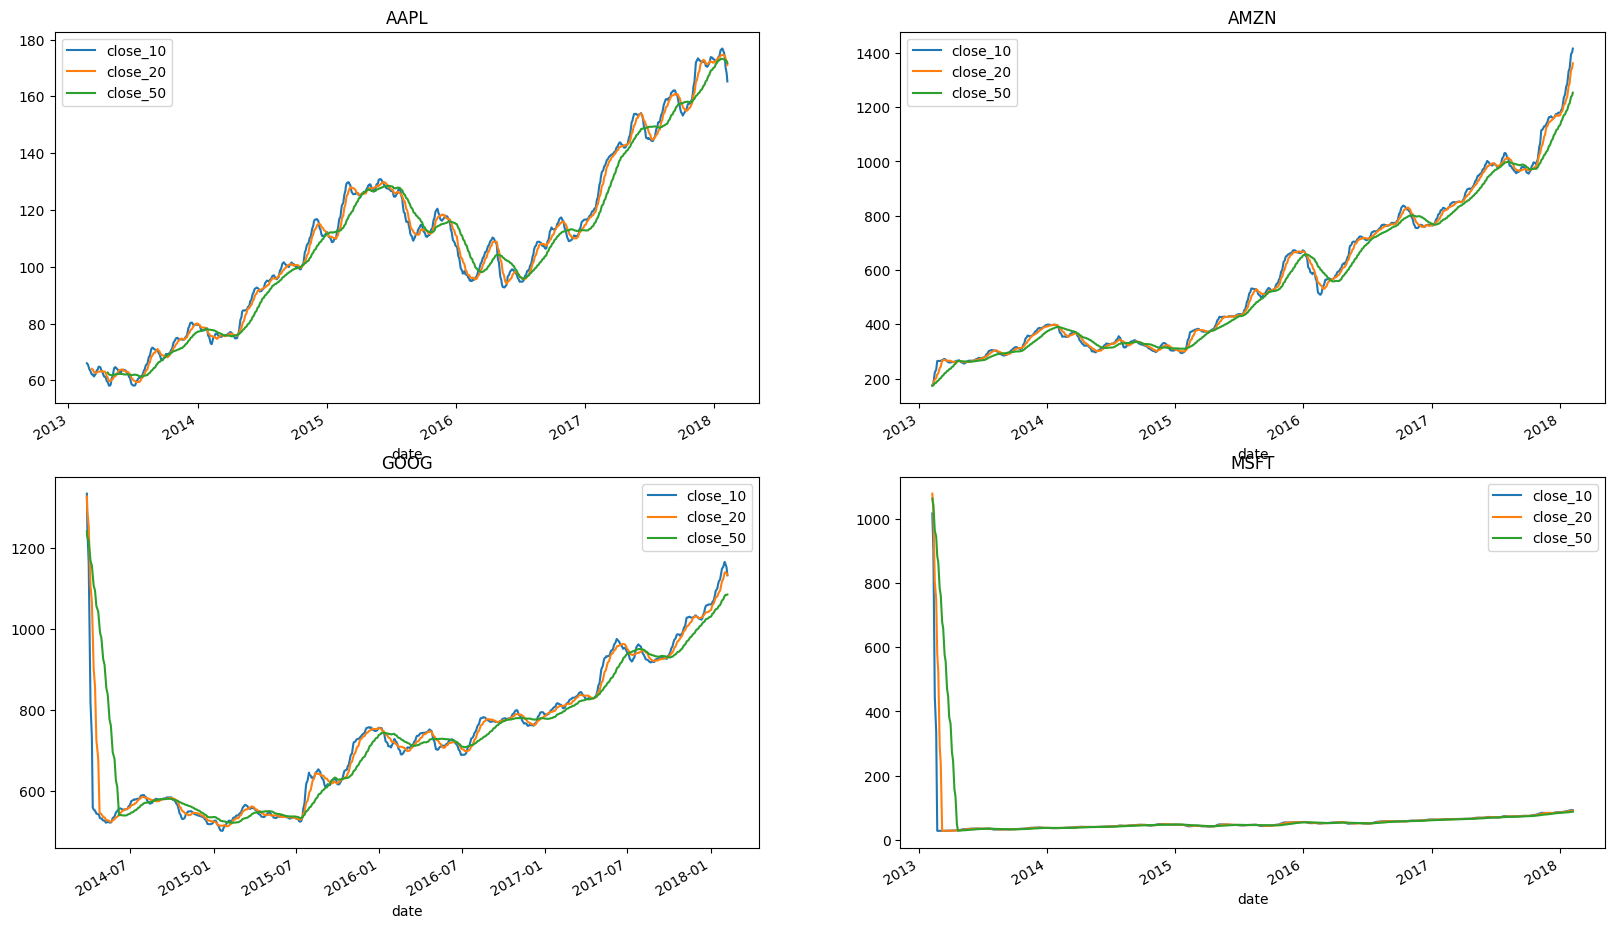

In [22]:
plt.figure(figsize=(20,12))

for index, company in enumerate(tech_list, 1):
  plt.subplot(2, 2, index)
  filter1 = new_data['Name']==company
  df = new_data[filter1]
  df[['close_10', 'close_20', 'close_50']].plot(ax=plt.gca())
  plt.title(company)

## Observing closing price change in Apple stock

In [23]:
apple_data = pd.read_csv(r'/content/drive/MyDrive/Datasets/Stocks_Data/AAPL_data.csv')

In [24]:
apple_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [25]:
apple_data['close']

,close
0,67.8542
1,68.5614
2,66.8428
3,66.7156
4,66.6556
...,...
1254,167.7800
1255,160.5000
1256,156.4900
1257,163.0300


In [26]:
apple_data['Daily return(in %)'] = apple_data['close'].pct_change()*100
apple_data

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934
...,...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,0.209043
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,-4.339015
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,-2.498442
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL,4.179181


In [27]:
import plotly.express as px

In [28]:
px.line(apple_data, x='date', y='Daily return(in %)', title='Apple Daily Return')

## Performing resampling analysis of closing price

In [29]:
apple_data.dtypes

,0
date,object
open,float64
high,float64
low,float64
close,float64
volume,int64
Name,object
Daily return(in %),float64


In [30]:
apple_data['date'] = pd.to_datetime(apple_data['date'])

In [32]:
apple_data.dtypes

,0
date,datetime64[ns]
open,float64
high,float64
low,float64
close,float64
volume,int64
Name,object
Daily return(in %),float64


In [33]:
apple_data.set_index('date', inplace=True)

In [38]:
# Month-wise analysis
apple_data['close'].resample('M').mean()

,close
date,
2013-02-28,65.306264
2013-03-31,63.120110
2013-04-30,59.966432
2013-05-31,63.778927
2013-06-30,60.791120
...,...
2017-10-31,157.817273
2017-11-30,172.406190
2017-12-31,171.891500


<Axes: xlabel='date'>

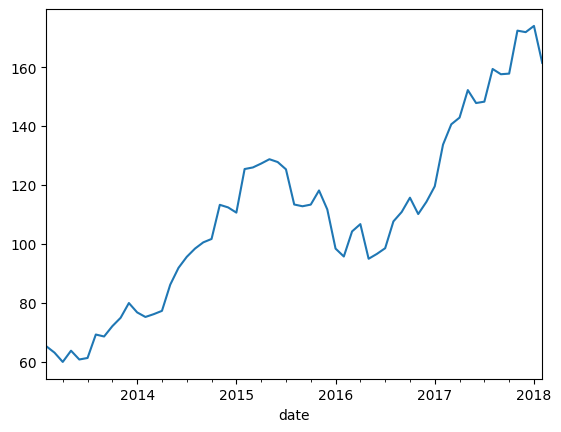

In [35]:
apple_data['close'].resample('M').mean().plot()

In [39]:
# Year-wise analysis
apple_data['close'].resample('Y').mean()

,close
date,
2013-12-31,67.237839
2014-12-31,92.264531
2015-12-31,120.039861
2016-12-31,104.604008
2017-12-31,150.585080
2018-12-31,171.594231


<Axes: xlabel='date'>

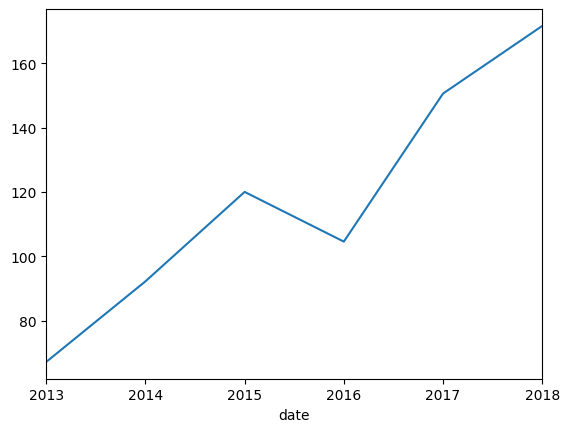

In [37]:
apple_data['close'].resample('Y').mean().plot()

In [40]:
# Quarter-wise analysis
apple_data['close'].resample('Q').mean()

,close
date,
2013-03-31,64.020291
2013-06-30,61.534692
2013-09-30,66.320670
2013-12-31,75.567478
2014-03-31,76.086293
2014-06-30,85.117475
2014-09-30,98.163311
2014-12-31,108.821016
2015-03-31,120.776721


<Axes: xlabel='date'>

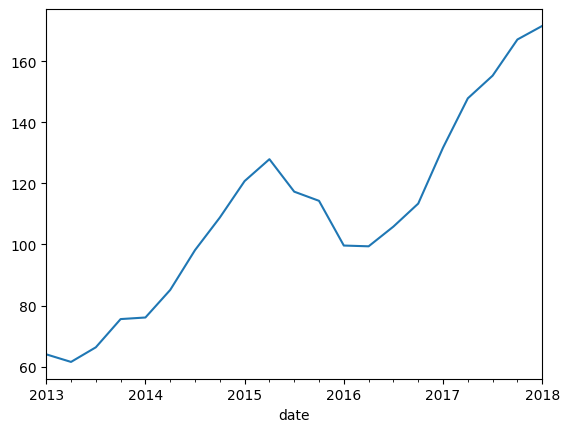

In [41]:
apple_data['close'].resample('Q').mean().plot()

### Performing multi-variate analysis to understand co-relation

In [42]:
appl = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
goog = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

In [43]:
closing_price = pd.DataFrame()

In [44]:
closing_price['appl_close'] = appl['close']
closing_price['amzn_close'] = amzn['close']
closing_price['goog_close'] = goog['close']
closing_price['msft_close'] = msft['close']

In [45]:
closing_price

,appl_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


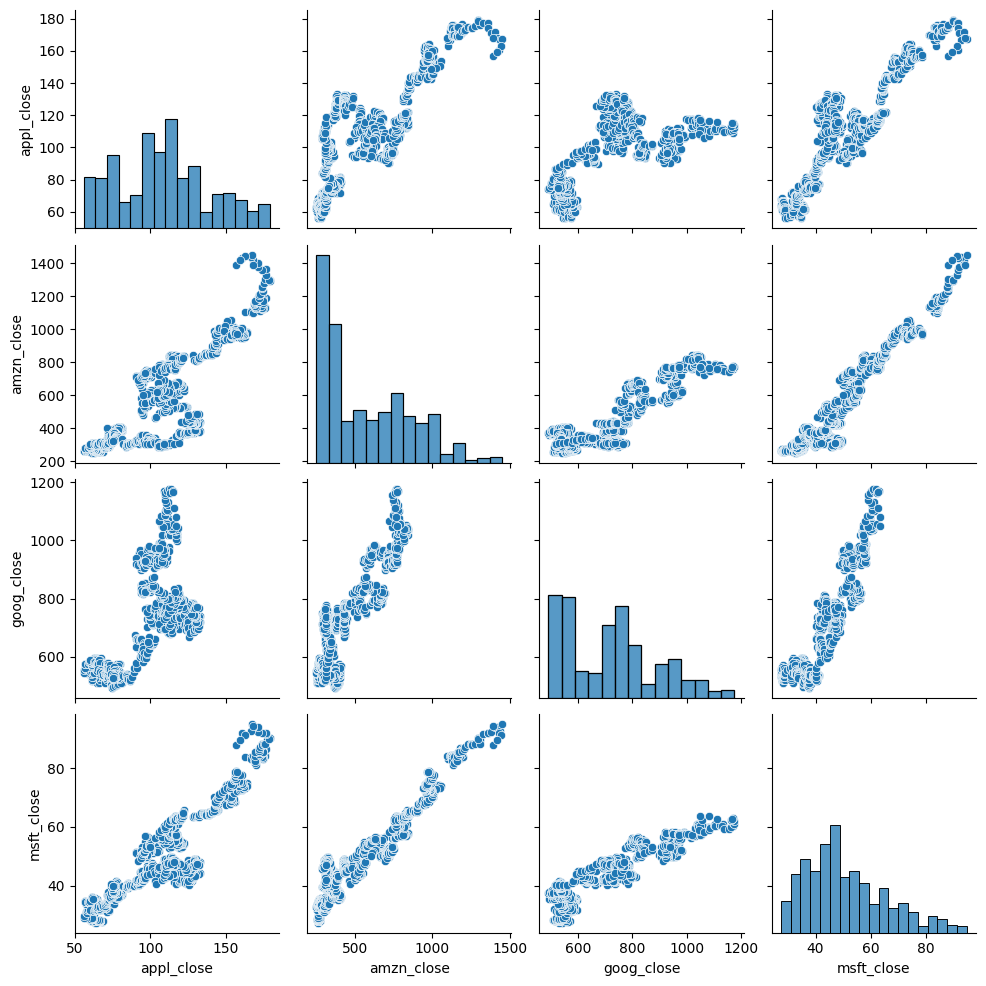

In [46]:
sns.pairplot(closing_price)

In [47]:
closing_price.corr()

,appl_close,amzn_close,goog_close,msft_close
appl_close,1.000000,0.819078,0.640522,0.899689
amzn_close,0.819078,1.000000,0.888456,0.955977
goog_close,0.640522,0.888456,1.000000,0.907011
msft_close,0.899689,0.955977,0.907011,1.000000


<Axes: >

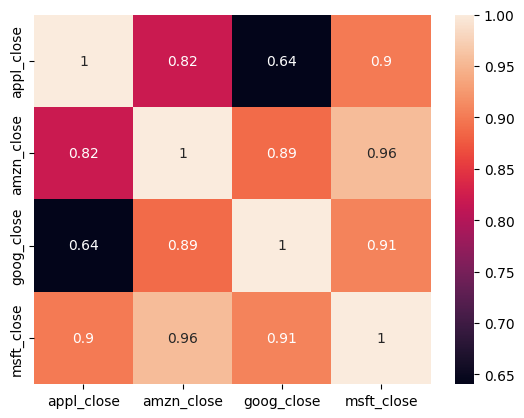

In [48]:
sns.heatmap(closing_price.corr(), annot=True)

### Performing co-relation analysis

In [49]:
closing_price

,appl_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


In [50]:
closing_price['appl_close']

,appl_close
0,67.8542
1,68.5614
2,66.8428
3,66.7156
4,66.6556
...,...
1254,167.7800
1255,160.5000
1256,156.4900
1257,163.0300


In [51]:
closing_price['appl_close'].shift(1)

,appl_close
0,NaN
1,67.8542
2,68.5614
3,66.8428
4,66.7156
...,...
1254,167.4300
1255,167.7800
1256,160.5000
1257,156.4900


In [52]:
(closing_price['appl_close'] - closing_price['appl_close'].shift(1))/closing_price['appl_close'].shift(1)*100

,appl_close
0,NaN
1,1.042235
2,-2.506658
3,-0.190297
4,-0.089934
...,...
1254,0.209043
1255,-4.339015
1256,-2.498442
1257,4.179181


In [53]:
for col in closing_price.columns:
  closing_price[col+'_pct_change'] = (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1)*100

In [54]:
closing_price.columns

Index(['appl_close', 'amzn_close', 'goog_close', 'msft_close',
       'appl_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [58]:
closing_p = closing_price[['appl_close_pct_change', 'amzn_close_pct_change', 'goog_close_pct_change', 'msft_close_pct_change']]
closing_p

,appl_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,0.273968,1.125227
2,-2.506658,0.579293,-0.539295,0.071788
3,-0.190297,4.163123,1.829542,0.538020
4,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...
1254,0.209043,-4.196734,NaN,-0.789391
1255,-4.339015,2.874101,NaN,-2.631021
1256,-2.498442,-2.793804,NaN,-4.118544
1257,4.179181,3.801439,NaN,3.784091


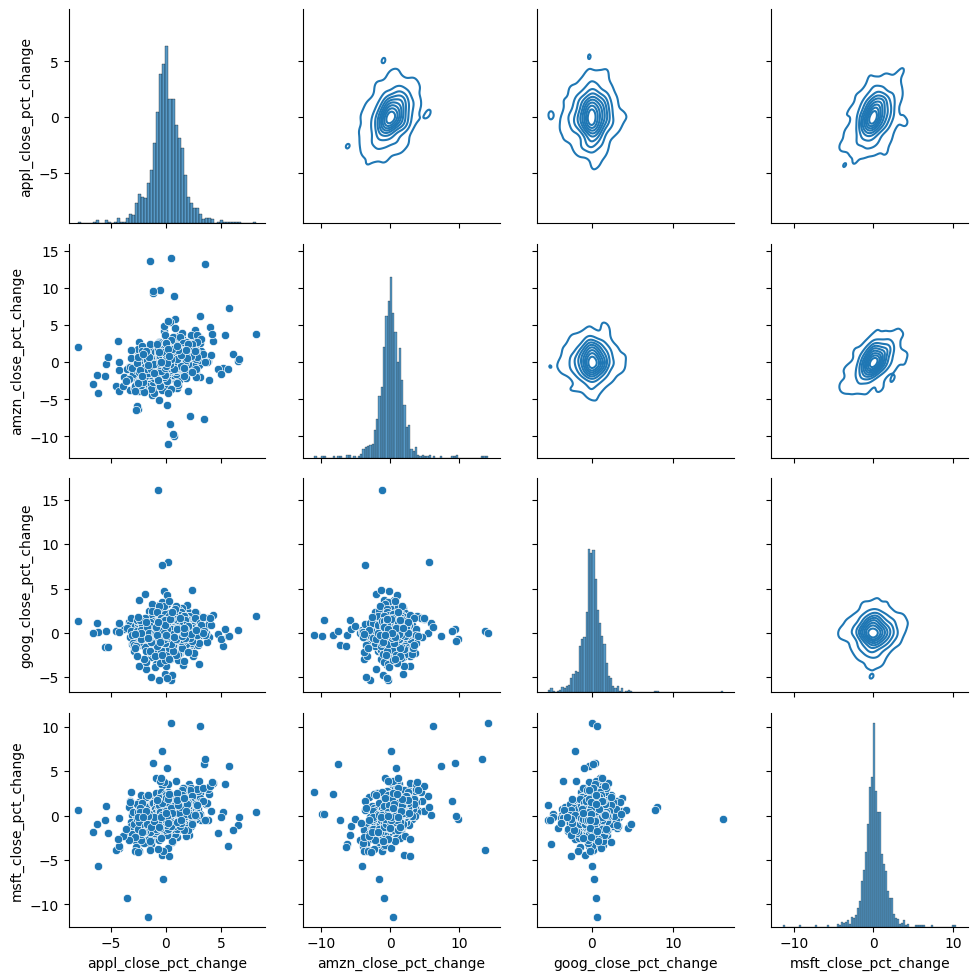

In [59]:
g = sns.PairGrid(data=closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [60]:
closing_p.corr()

,appl_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
appl_close_pct_change,1.000000,0.287659,0.036202,0.366598
amzn_close_pct_change,0.287659,1.000000,0.027698,0.402678
goog_close_pct_change,0.036202,0.027698,1.000000,0.038939
msft_close_pct_change,0.366598,0.402678,0.038939,1.000000


### The inference that we got from the stock analysis is that the Amazon and Microsoft stocks show linear co-relation